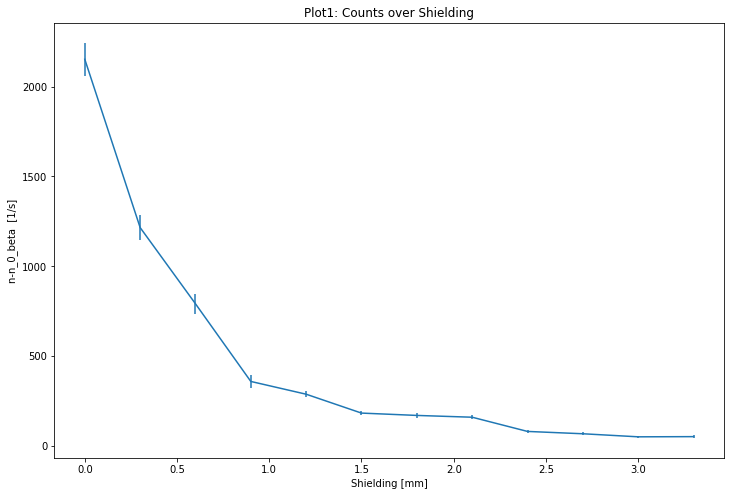

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Plotting Beta_Radiation Counts over Shielding 

n_i=np.array([538,304,198,90,289,184,171,161,82,69,52,53])
n_i_err=np.sqrt(n_i)
norm=np.array([4,4,4,4,1,1,1,1,1,1,1,1])
n_o=139/300*np.ones(len(n_i))
n=n_i*norm-n_o
nerr=n_i_err*norm-n_o

s=np.array([0,0.3,0.6,0.9,1.2,1.5,1.8,2.1,2.4,2.7,3.0,3.3])

plt.figure(figsize=(12,8))
plt.errorbar(s,n,yerr=nerr)
plt.title('Plot1: Counts over Shielding')
plt.ylabel('n-n_0_beta  [1/s]')
plt.xlabel ('Shielding [mm]')
plt.savefig("Plot1.pdf",format="pdf")

A= 50.96497283849391 +- 1.3657071457688115
m= 0.06208658196025157 +- 0.0016220870064999838
chi2= 35.50865301533085
chi2_red= 3.945405890592317
probability= 0.0 %


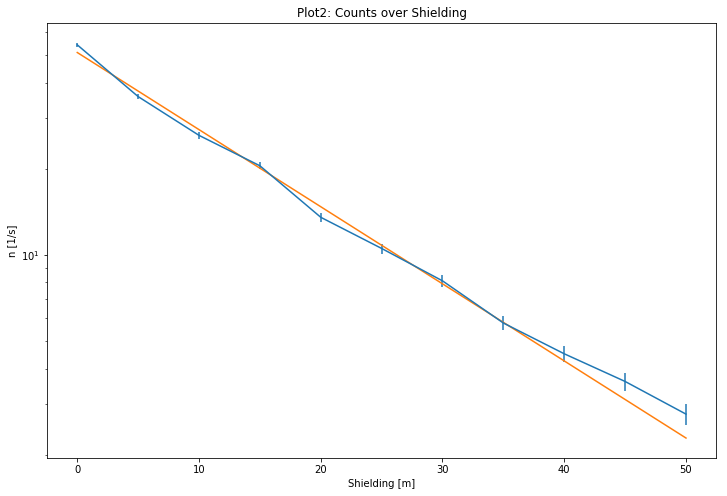

<Figure size 864x576 with 0 Axes>

In [92]:
def fit_func(x,A,m):
    return A*np.exp(-x*m)

n=np.array([3274,2166,1591,1250,833,653,508,368,292,238,188])
nerr=np.sqrt(n)
n=n/60
nerr=nerr/60
s=np.linspace(0,5,11)*10

#calculating background from the two background-measurements
background=(117+100)/2
background_err=np.sqrt(np.sqrt(117)**2+(np.sqrt(100)**2))/2
norm=5*60
background=background/norm 
background_err=background_err/norm 

#corrected values with background 
n=n-background
nerr=np.sqrt(nerr**2+background_err**2)

popt,pcov=curve_fit(fit_func,s,n,sigma=nerr)

print('A=',popt[0],'+-',np.sqrt(pcov[0,0]))
print('m=',popt[1],'+-',np.sqrt(pcov[1,1]))

plt.figure(figsize=(12,8))
plt.errorbar(s,n,yerr=nerr)
plt.plot(s,fit_func(s,popt[0],popt[1]))
plt.yscale('log')
plt.title('Plot2: Counts over Shielding')
plt.ylabel('n [1/s]')
plt.xlabel ('Shielding [m]')
plt.figure(figsize=(12,8))
plt.savefig("Plot2.pdf",format="pdf")

chi2_=np.sum((fit_func(s,*popt)-n)**2/(nerr)**2) 
dof=len(n)-2 #dof:degrees of freedom
chi2_red=chi2_/dof
print("chi2=", chi2_)
print("chi2_red=",chi2_red)
from scipy.stats import chi2
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("probability=", prob,"%")

pressure where activity halved:
354.276+-4.743 mbar
chi2= 13.085541866070212
chi2_red= 1.0065801435438624
probability= 44.0 %


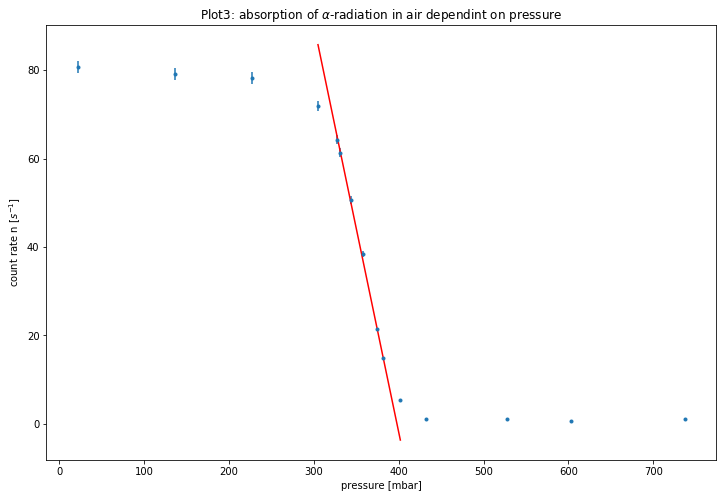

In [93]:
def fit_func(x,a,b):
    return a*x+b
    
p=np.array([22,137,227,305,327,331,344,358,374,382,402,432,528,603,737])
perr=np.ones(len(p))
n=np.array([4861,4772,4718,4335,3877,3700,3057,2326,1304,918,339,91,88,59,83])
nerr=np.sqrt(n)
n=n/60-background
nerr=np.sqrt((n/60)**2+(background_err**2))

popt,pcov=curve_fit(fit_func,p[4:-5],n[4:-5],sigma=nerr[4:-5],absolute_sigma=True)

print("pressure where activity halved:")
pr = (n[0]/2 - popt[1])/popt[0]
prp = (n[0]/2 - popt[1])/(popt[0]+np.sqrt(pcov[0,0]))
prn = (n[0]/2 - popt[1])/(popt[0]-np.sqrt(pcov[0,0]))
diff = (prp-pr +pr-prn)/2
print(str(round(pr,3)) + "+-" + str(round(diff,3)) + " mbar")

plt.figure(figsize=(12,8))
plt.ylabel("count rate n [$s^{-1}$]")
plt.xlabel("pressure [mbar]")
plt.title("Plot3: absorption of $\\alpha$-radiation in air dependint on pressure")

plt.plot(p[3:-4],fit_func(p[3:-4],*popt),'r')
plt.errorbar(p,n,xerr=perr,yerr=nerr, fmt='.')
plt.savefig("Plot3.pdf", format="pdf")

chi2_=np.sum((fit_func(p[4:-5],*popt)-n[4:-5])**2/(nerr[4:-5])**2) 
dof=len(n)-2 #dof:degrees of freedom
chi2_red=chi2_/dof
print("chi2=", chi2_)
print("chi2_red=",chi2_red)
from scipy.stats import chi2
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("probability=", prob,"%")